In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px 
import time

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)

color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = " your apı key " 



In [2]:
fred = Fred(fred_key) # pip install fred 

In [3]:
sp_search = fred.search("S&P",order_by="popularity") # raw data çekme örneği 

In [4]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-09-19,2023-09-19,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-09-15,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-09-18 09:18:05-05:00,93,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-09-19,2023-09-19,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-06-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-08-29 08:11:02-05:00,89,"For more information regarding the index, plea..."
MEHOINUSA672N,MEHOINUSA672N,2023-09-19,2023-09-19,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2021 CPI-U-RS Adjusted Dollars,2021 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,83,Household data are collected as of March. As ...
SP500,SP500,2023-09-19,2023-09-19,S&P 500,2013-09-19,2023-09-18,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-09-18 19:10:56-05:00,82,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-09-19,2023-09-19,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-09-15,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-09-18 09:18:09-05:00,82,This data represents the effective yield of th...


In [5]:
sp500 = fred.get_series(series_id="SP500")

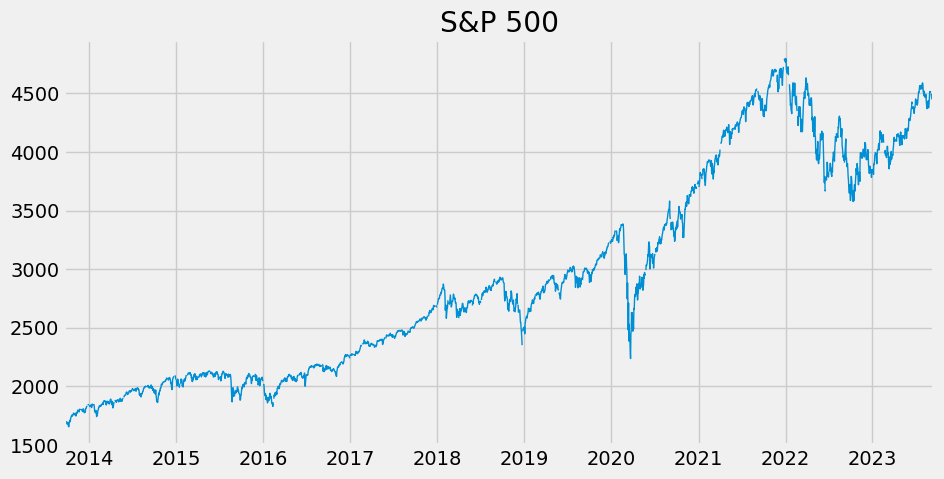

In [6]:
sp500.plot(figsize=(10,5),title="S&P 500",lw=1) #"S&P 500 Amerikanın en büyük 500 şirket hissesinin yıllara göre fiyat takip grafiği"
plt.show()

In [7]:
uemp_results = fred.search("unemployment") # işsizlik verilerini listeleyen veri setlerini çekiyoruz. 

In [8]:
uemp_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-09-19,2023-09-19,Unemployment Rate,1948-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-01 07:45:02-05:00,93,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-09-19,2023-09-19,Unemployment Rate,1948-01-01,2023-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-09-01 07:45:34-05:00,54,The unemployment rate represents the number of...
CCSA,CCSA,2023-09-19,2023-09-19,Continued Claims (Insured Unemployment),1967-01-07,2023-09-02,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-09-14 07:33:03-05:00,72,"Continued claims, also referred to as insured ..."
UNEMPLOY,UNEMPLOY,2023-09-19,2023-09-19,Unemployment Level,1948-01-01,2023-08-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-09-01 07:45:25-05:00,67,The series comes from the 'Current Population ...
CCNSA,CCNSA,2023-09-19,2023-09-19,Continued Claims (Insured Unemployment),1967-01-07,2023-09-02,"Weekly, Ending Saturday",W,Number,Number,Not Seasonally Adjusted,NSA,2023-09-14 07:33:02-05:00,35,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PUAICIN,PUAICIN,2023-09-19,2023-09-19,Pandemic Unemployment Assistance Initial Claim...,2020-04-04,2022-11-05,"Weekly, Ending Saturday",W,Number,Number,Not Seasonally Adjusted,NSA,2022-11-14 07:33:04-06:00,5,An initial claim is a claim filed by an unempl...
OHFRAN0URN,OHFRAN0URN,2023-09-19,2023-09-19,"Unemployment Rate in Franklin County, OH",1990-01-01,2023-07-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-08-30 10:24:02-05:00,5,These data come from the Current Population Su...
UTSALT5URN,UTSALT5URN,2023-09-19,2023-09-19,"Unemployment Rate in Salt Lake County, UT",1990-01-01,2023-07-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-08-30 10:14:04-05:00,5,These data come from the Current Population Su...


In [9]:
unrate = fred.get_series("UNRATE") # işsizlik veri seti içinden UNRATE adlı seriyi çekiyoruz. 
                                   #"UNRATE" Amerika Birleşik Devletleri'ndeki işsizlik oranını temsil eden bir veri serisidir.

<Axes: >

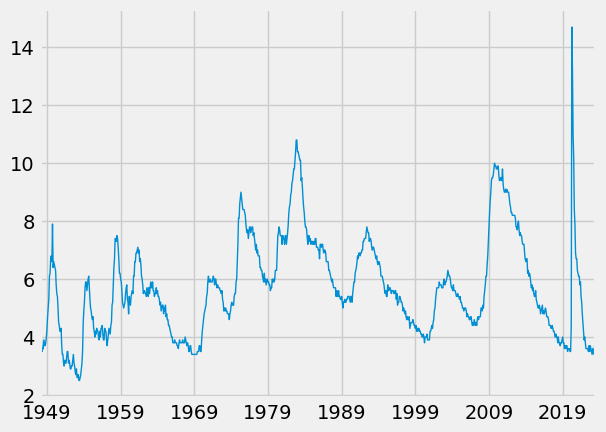

In [10]:
unrate.plot(lw=1)

In [11]:
unemp_df = fred.search("unemployment rate state",filter=("frequency","Monthly")) 

In [12]:
unemp_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-09-19,2023-09-19,Unemployment Rate,1948-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-01 07:45:02-05:00,93,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-09-19,2023-09-19,Unemployment Rate,1948-01-01,2023-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-09-01 07:45:34-05:00,54,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2023-09-19,2023-09-19,Unemployment Level,1948-01-01,2023-08-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-09-01 07:45:25-05:00,67,The series comes from the 'Current Population ...
LNS14000006,LNS14000006,2023-09-19,2023-09-19,Unemployment Rate - Black or African American,1972-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-01 07:45:24-05:00,67,The series comes from the 'Current Population ...
LNU04000006,LNU04000006,2023-09-19,2023-09-19,Unemployment Rate - Black or African American,1972-01-01,2023-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-09-01 07:46:14-05:00,16,The series comes from the 'Current Population ...


In [13]:
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent" ') # filtreme işlemi yapıyoruz. 

In [14]:
unemp_df = unemp_df.loc[unemp_df["title"].str.contains("Unemployment Rate")] # işsizlik oranları ile ilgili veri içeren satırları çekiyoruz. 

In [15]:
unemp_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-09-19,2023-09-19,Unemployment Rate,1948-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-01 07:45:02-05:00,93,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2023-09-19,2023-09-19,Unemployment Rate - Black or African American,1972-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-01 07:45:24-05:00,67,The series comes from the 'Current Population ...
CAUR,CAUR,2023-09-19,2023-09-19,Unemployment Rate in California,1976-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-21 09:44:02-05:00,58,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2023-09-19,2023-09-19,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,51,Series Is Presented Here As Three Variables--(...
M0892BUSM156SNBR,M0892BUSM156SNBR,2023-09-19,2023-09-19,Unemployment Rate for United States,1940-01-01,1946-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:29:19-05:00,7,Series Is Presented Here As Three Variables--(...


In [16]:
unemp_df.index

Index(['UNRATE', 'LNS14000006', 'CAUR', 'M0892AUSM156SNBR', 'M0892BUSM156SNBR',
       'TXUR', 'LNS14000002', 'FLUR', 'NYUR', 'LNS14000031', 'LNS14000024',
       'U2RATE', 'LNS14000009', 'LNS14024887', 'LNS14000003', 'LNS14000001',
       'OHUR', 'COUR', 'PAUR', 'ALUR', 'MIUR', 'TNUR', 'NMUR', 'LNS14027662',
       'WIUR', 'NCUR', 'NJUR', 'MAUR', 'LNS14027660', 'MNUR', 'GAUR', 'MDUR',
       'LNS14032183', 'KYUR', 'AZUR', 'WAUR', 'VAUR', 'ILUR', 'LNS14000012',
       'SCUR', 'ORUR', 'ARUR', 'INUR', 'MOUR', 'WVUR', 'UTUR', 'LNS14027659',
       'IAUR', 'LNS14000018', 'LNS14000060', 'NVUR', 'DCUR', 'AKUR',
       'LRUN64TTUSM156S', 'LASMT261982000000003', 'OKUR', 'LAUR', 'NDUR',
       'MSUR', 'MEUR', 'NEUR', 'IDUR', 'PRUR', 'KSUR', 'LNS14000036', 'HIUR',
       'NHUR', 'LASMT391746000000003', 'CMWRUR', 'LNS14000032', 'MTUR', 'CTUR',
       'LNS14027689', 'SDUR', 'LNS14000028', 'DEUR', 'RIUR', 'LRUN24TTUSM156S',
       'LNS14024230', 'LNS14000089', 'WYUR', 'VTUR', 'CNERUR', 'LNS14000048

In [17]:
all_results = []

for myid in unemp_df.index: # index isimleri ile döngüye giriyoruz.
    results = fred.get_series(myid) # her index serisini çekiyoruz. 
    results = results.to_frame(name=myid) # her seriyi ayrı ayrı dataframe dönüştürüyoruz
    all_results.append(results) # yeni listeye ekliyoruz.
    time.sleep(0.1) 
uemp_results = pd.concat(all_results, axis=1) # ayrı dataframeleri tek dataframe haline getiriyoruz. 



In [18]:
all_results[8]

,NYUR
1976-01-01,10.3
1976-02-01,10.3
1976-03-01,10.2
1976-04-01,10.2
1976-05-01,10.1
...,...
2023-03-01,4.1
2023-04-01,4.0
2023-05-01,3.9
2023-06-01,3.9


In [19]:
uemp_results.head() 

,UNRATE,LNS14000006,CAUR,M0892AUSM156SNBR,M0892BUSM156SNBR,TXUR,LNS14000002,FLUR,NYUR,LNS14000031,LNS14000024,U2RATE,LNS14000009,LNS14024887,LNS14000003,LNS14000001,OHUR,COUR,PAUR,ALUR,MIUR,TNUR,NMUR,LNS14027662,WIUR,NCUR,NJUR,MAUR,LNS14027660,MNUR,GAUR,MDUR,LNS14032183,KYUR,AZUR,WAUR,VAUR,ILUR,LNS14000012,SCUR,ORUR,ARUR,INUR,MOUR,WVUR,UTUR,LNS14027659,IAUR,LNS14000018,LNS14000060,NVUR,DCUR,AKUR,LRUN64TTUSM156S,LASMT261982000000003,OKUR,LAUR,NDUR,MSUR,MEUR,NEUR,IDUR,PRUR,KSUR,LNS14000036,HIUR,NHUR,LASMT391746000000003,CMWRUR,LNS14000032,MTUR,CTUR,LNS14027689,SDUR,LNS14000028,DEUR,RIUR,LRUN24TTUSM156S,LNS14024230,LNS14000089,WYUR,VTUR,CNERUR,LNS14000048,CWSTUR,LNS14000026,CSOUUR,CNEWUR,LNS14000091,CENCUR,LNS14200000,LNS14000029,LNS14100000,LNS14000025,LRUNTTTTUSM156S,LNS14000013
1929-04-01,NaN,NaN,NaN,0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,1.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,2.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,0.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
cols_to_drop = []
for i in uemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis=1) # index isimlerin uzunluğu 4'ten büyükse atıyoruz

In [21]:
uemp_states = uemp_results.copy()
uemp_states = uemp_states.dropna() 
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict() # title içinde isim kısaltma işlemi yapıyoruz. ve dict dönüştürme işlemi uygulanıyor.
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns] 


In [32]:
unemp_df['title'].str.replace('Unemployment Rate in ','') # id ve states name eşliyoruz. 

series id
UNRATE                                              Unemployment Rate
LNS14000006             Unemployment Rate - Black or African American
CAUR                                                       California
M0892AUSM156SNBR                  Unemployment Rate for United States
M0892BUSM156SNBR                  Unemployment Rate for United States
                                          ...                        
LNS14000029           Unemployment Rate - 20 Yrs. & over, White Women
LNS14100000                       Unemployment Rate Full-Time Workers
LNS14000025                   Unemployment Rate - 20 Yrs. & over, Men
LRUNTTTTUSM156S     Unemployment Rate: Aged 15 and over: All Perso...
LNS14000013                       Unemployment Rate - 16-19 Yrs., Men
Name: title, Length: 96, dtype: object

In [38]:
uemp_states

,California,Texas,Florida,New York,Ohio,Colorado,Pennsylvania,Alabama,Michigan,Tennessee,New Mexico,Wisconsin,North Carolina,New Jersey,Massachusetts,Minnesota,Georgia,Maryland,Kentucky,Arizona,Washington,Virginia,Illinois,South Carolina,Oregon,Arkansas,Indiana,Missouri,West Virginia,Utah,Iowa,Nevada,the District of Columbia,Alaska,Oklahoma,Louisiana,North Dakota,Mississippi,Maine,Nebraska,Idaho,Puerto Rico,Kansas,Hawaii,New Hampshire,Montana,Connecticut,South Dakota,Delaware,Rhode Island,Wyoming,Vermont
1976-01-01,9.2,5.8,9.7,10.3,8.1,5.8,8.0,6.6,9.9,6.0,8.6,5.8,6.4,10.3,10.5,6.0,8.4,6.4,5.6,10.2,8.5,6.1,6.6,7.4,9.5,7.3,6.6,5.9,7.5,5.8,4.3,9.2,8.7,7.1,5.8,6.3,3.4,6.7,8.7,3.3,5.6,19.6,4.2,9.8,6.5,5.8,9.8,3.3,8.0,7.8,4.1,8.6
1976-02-01,9.2,5.8,9.7,10.3,8.1,5.7,8.1,6.6,9.9,6.0,8.7,5.8,6.4,10.3,10.5,6.0,8.4,6.4,5.6,10.2,8.5,6.1,6.6,7.4,9.5,7.3,6.6,5.9,7.5,5.9,4.3,9.2,8.7,7.1,5.8,6.3,3.4,6.7,8.7,3.3,5.6,19.5,4.2,9.8,6.5,5.8,9.8,3.3,8.0,7.8,4.1,8.6
1976-03-01,9.1,5.9,9.6,10.2,8.1,5.7,8.1,6.6,9.9,6.0,8.7,5.7,6.4,10.3,10.5,5.9,8.4,6.4,5.6,10.1,8.4,6.1,6.6,7.3,9.4,7.3,6.5,5.9,7.5,5.8,4.3,9.2,8.6,7.0,5.8,6.3,3.4,6.6,8.6,3.3,5.6,19.3,4.2,9.8,6.5,5.8,9.8,3.2,8.0,7.7,4.1,8.6
1976-04-01,9.1,5.9,9.5,10.2,8.0,5.6,8.1,6.5,9.8,6.0,8.6,5.6,6.3,10.3,10.3,5.8,8.3,6.4,5.6,10.0,8.5,6.0,6.6,7.2,9.2,7.2,6.3,6.0,7.5,5.8,4.2,9.0,8.5,6.9,5.8,6.4,3.5,6.4,8.6,3.2,5.6,19.0,4.2,9.7,6.5,5.8,9.6,3.1,8.1,7.7,4.0,8.6
1976-05-01,9.0,5.9,9.3,10.1,7.8,5.6,8.1,6.4,9.6,5.9,8.6,5.5,6.1,10.3,10.1,5.7,8.1,6.5,5.5,9.8,8.5,5.9,6.6,7.0,9.1,7.1,6.0,6.0,7.4,5.7,4.1,8.9,8.4,6.9,5.7,6.5,3.6,6.3,8.5,3.1,5.6,18.9,4.2,9.4,6.5,5.8,9.4,3.1,8.3,7.7,3.9,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,4.4,4.0,2.6,4.1,3.8,2.8,4.2,2.3,4.1,3.4,3.5,2.5,3.5,3.5,3.5,2.8,3.1,2.7,3.8,3.5,4.5,3.2,4.4,3.2,4.4,3.0,3.1,2.5,3.4,2.4,2.8,5.5,4.8,3.7,3.0,3.6,2.1,3.5,2.6,2.1,2.6,6.0,2.9,3.5,2.4,2.3,3.9,1.9,4.4,3.1,3.7,2.7
2023-04-01,4.5,4.0,2.6,4.0,3.7,2.8,4.1,2.2,3.8,3.3,3.5,2.4,3.4,3.5,3.1,2.8,3.1,2.5,3.7,3.4,4.3,3.1,4.2,3.1,4.0,2.8,3.0,2.5,3.3,2.3,2.7,5.4,5.0,3.7,2.9,3.6,2.1,3.4,2.4,2.0,2.6,6.0,2.9,3.3,2.1,2.3,3.8,1.9,4.3,3.0,3.5,2.4
2023-05-01,4.5,4.1,2.6,3.9,3.6,2.8,4.0,2.2,3.7,3.3,3.5,2.4,3.4,3.6,2.8,2.9,3.2,2.4,3.8,3.4,4.1,2.9,4.1,3.1,3.7,2.7,3.1,2.5,3.3,2.3,2.7,5.4,5.1,3.6,2.8,3.6,2.1,3.2,2.4,1.9,2.6,6.1,2.9,3.1,1.9,2.3,3.7,1.9,4.2,3.0,3.3,2.1
2023-06-01,4.6,4.1,2.6,3.9,3.4,2.8,3.8,2.2,3.6,3.2,3.5,2.5,3.3,3.7,2.6,2.9,3.2,2.0,3.8,3.5,3.8,2.7,4.0,3.1,3.5,2.6,3.2,2.6,3.3,2.4,2.7,5.4,5.1,3.7,2.7,3.6,2.0,3.1,2.4,1.9,2.7,6.1,2.8,3.0,1.8,2.4,3.7,1.8,4.2,2.9,3.1,1.9


In [22]:
px.line(uemp_states)

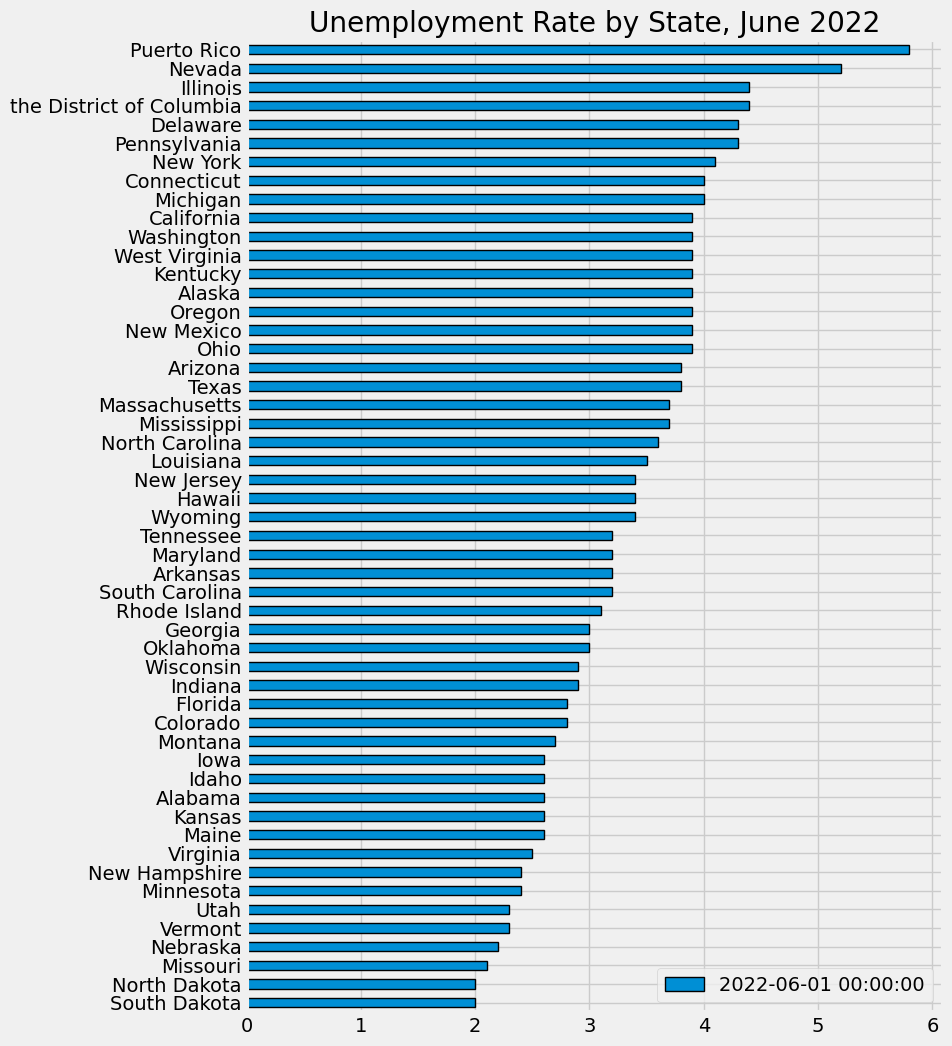

In [23]:
data_2022 = uemp_states.loc[uemp_states.index == '2022-06-01'].T \
    .sort_values('2022-06-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.5, edgecolor='black',
          title='Unemployment Rate by State, June 2022',lw = 1) 
   

##### Ülkenin Çalışma Gücüne Katılım Oranının İşsizlik Oranı ile Veri Analizini Yapmak için aynı veri çekme işlemlerini fred API ile uyguluyoruz.

In [24]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly')) # aynı işlemleri farklı data çekmek için uyguluyoruz 
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"') # çalışma gücünekatılım oranı ile iss

In [25]:
part_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CIVPART,CIVPART,2023-09-19,2023-09-19,Labor Force Participation Rate,1948-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-01 07:45:21-05:00,84,The series comes from the 'Current Population ...
LNS11300060,LNS11300060,2023-09-19,2023-09-19,Labor Force Participation Rate - 25-54 Yrs.,1948-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-01 07:45:24-05:00,67,The series comes from the 'Current Population ...
LNS11300002,LNS11300002,2023-09-19,2023-09-19,Labor Force Participation Rate - Women,1948-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-01 07:45:24-05:00,65,To obtain estimates of women worker employment...
LNS11300001,LNS11300001,2023-09-19,2023-09-19,Labor Force Participation Rate - Men,1948-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-01 07:45:34-05:00,57,The series comes from the 'Current Population ...
LNS11324230,LNS11324230,2023-09-19,2023-09-19,Labor Force Participation Rate - 55 Yrs. & over,1948-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-01 07:45:34-05:00,51,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRACTTFEUSM156S,LRACTTFEUSM156S,2023-09-19,2023-09-19,Activity Rate: Aged 15 and over: Females for U...,1960-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-12 15:59:35-05:00,1,OECD Descriptor ID: LRACTTFE OECD unit ID: PC ...
LRACTTTTUSM156S,LRACTTTTUSM156S,2023-09-19,2023-09-19,Activity Rate: Aged 15 and Over: All Persons f...,1960-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-12 15:59:34-05:00,1,OECD Descriptor ID: LRACTTTT OECD unit ID: PC ...
LRINTTTTUSM156S,LRINTTTTUSM156S,2023-09-19,2023-09-19,Inactivity Rate: Aged 15 and over: All Persons...,1975-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-12 15:59:20-05:00,1,OECD Descriptor ID: LRINTTTT OECD unit ID: PC ...


In [39]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1)
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]


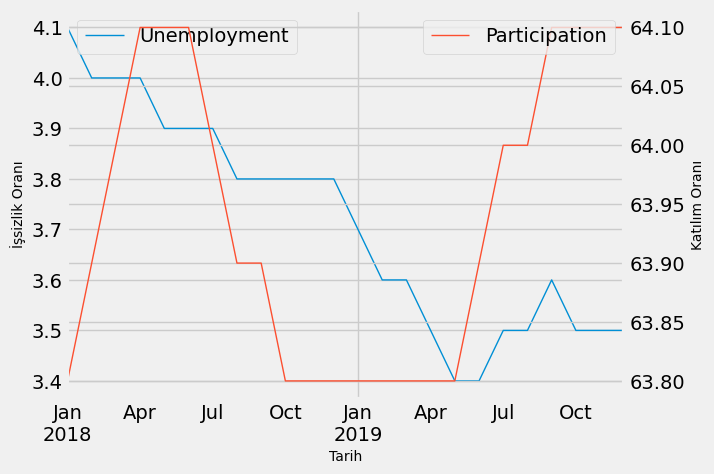

In [41]:
fig,ax = plt.subplots()
ax2 = ax.twinx()
uemp_states.query("index >= 2018 and index < 2020")["Texas"].plot(ax=ax, label="Unemployment",linewidth=1)
part_states.query("index >= 2018 and index < 2020")["Texas"].plot(ax=ax2, label="Participation", color=color_pal[1],linewidth=1)

ax.set_xlabel("Tarih",fontsize=10, fontweight='light')
ax.set_ylabel("İşsizlik Oranı",fontsize=10, fontweight='light')
ax2.set_ylabel("Katılım Oranı",fontsize=10, fontweight='light')

ax.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()


In [42]:
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'}) #___isim düzeltme işlemi__

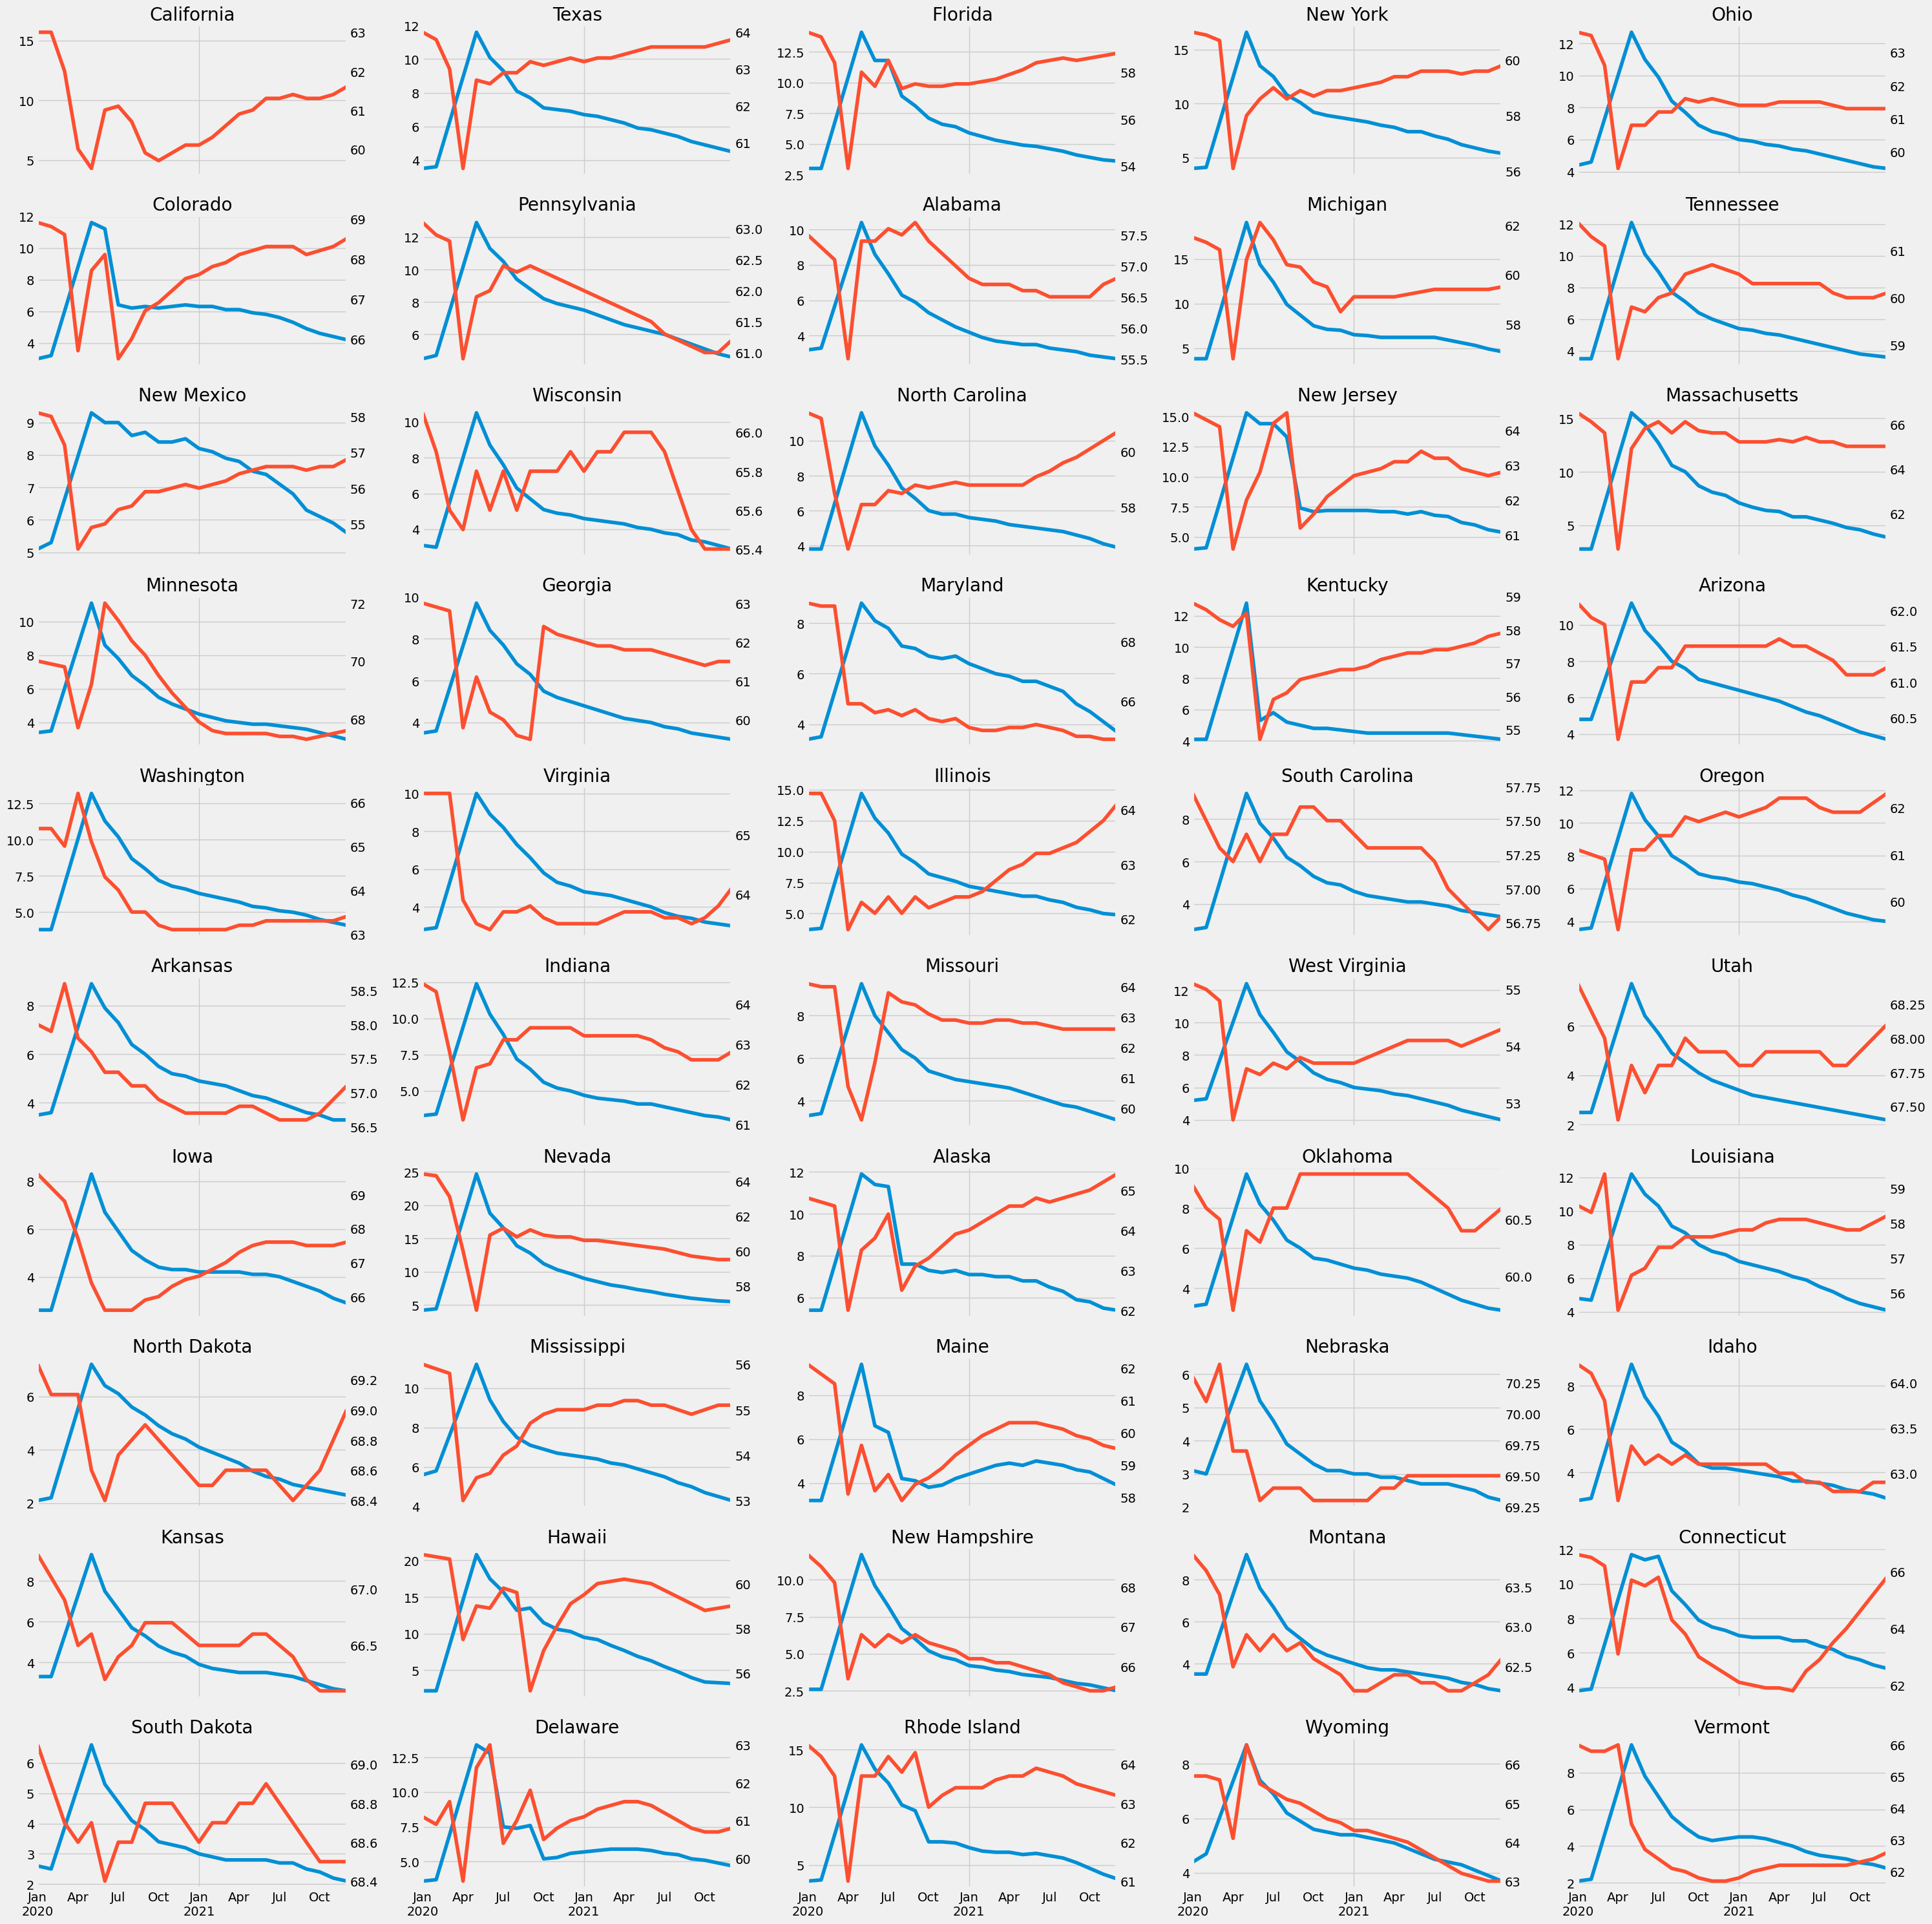

In [43]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

### İşşizlik oranı ve İşsizlik talebi ANALİZİ

In [57]:
Unemployment_Claims_df = fred.search("initial claims", filter=('frequency','Monthly'))
Unemployment_Claims_df= Unemployment_Claims_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [59]:
unemp_c_to_id_state =Unemployment_Claims_df['title'].str.replace('Leading Index for ','').to_dict()

all_results = []

for myid in Unemployment_Claims_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1)
unemp_c_states = pd.concat(all_results, axis=1)
unemp_c_states.columns = [unemp_c_to_id_state[c] for c in unemp_c_states.columns]

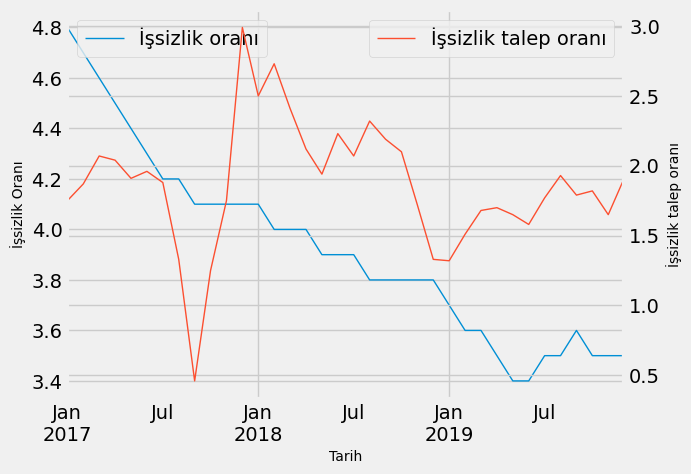

In [65]:
fig,ax = plt.subplots()
ax2 = ax.twinx()
uemp_states.query("index >= 2017 and index < 2020")["Texas"].plot(ax=ax, label="İşsizlik oranı",linewidth=1)

unemp_c_states.query("index >= 2017 and index < 2020")["Texas"].plot(ax=ax2, label="İşsizlik talep oranı", color=color_pal[1],linewidth=1)

ax.set_xlabel("Tarih",fontsize=10, fontweight='light')
ax.set_ylabel("İşsizlik Oranı",fontsize=10, fontweight='light')
ax2.set_ylabel("İşsizlik talep oranı",fontsize=10, fontweight='light')

ax.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

#####  İşsizlik talebi verileri genellikle daha kısa vadeli dalgalanmalara tepki verirken, işsizlik oranı ekonominin genel sağlığını gösterir. Bu verilere dayanarak
##### 2017 yılı ortasında işsizlik talebindeki ani düşüş ile işsizlik oranın seviyesini nüfusa oranlayarak baktığımızda daha stabil kalmasınin bir çok nedeni olabilir ama bu grafiğe genel baktığımızda her yıl sezonsal düşüş olduğunu görebiliriz. 
##### Ayrıca Ani bir işsizlik talebi düşüşü, işgücüne katılımda bir azalma anlamına gelebilir. Bu durumda, işsizlik oranı düşmez çünkü işgücüne katılan kişi sayısı da azalır.

### Nüfüs artışı ile işsizlik oranı Analizi

In [102]:
population_data = fred.get_series("POPTHM")
population_df = pd.DataFrame({"Population": population_data})

In [103]:
population_df

,Population
1959-01-01,175818.0
1959-02-01,176044.0
1959-03-01,176274.0
1959-04-01,176503.0
1959-05-01,176723.0
...,...
2023-03-01,334753.0
2023-04-01,334880.0
2023-05-01,335013.0
2023-06-01,335163.0


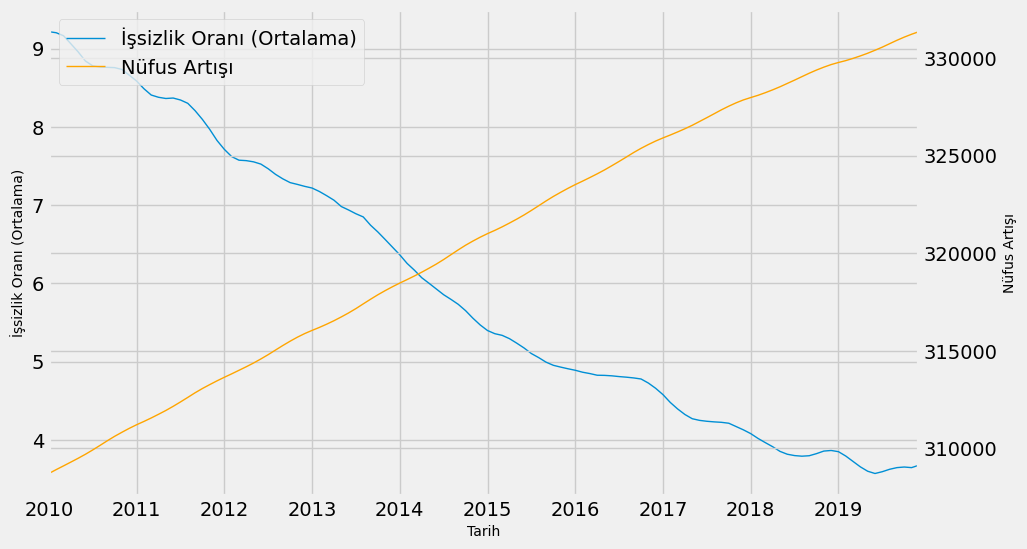

In [112]:
fig, ax = plt.subplots(figsize=(10, 6))
ax2 = ax.twinx()


uemp_states.query("index >= '2010-01-01' and index < '2020-01-01'").mean(axis=1).plot(ax=ax, label="İşsizlik Oranı (Ortalama)", linewidth=1)


population_df.query("index >= '2010-01-01' and index < '2020-01-01'")["Population"].plot(ax=ax2, label="Nüfus Artışı", color='orange', linewidth=1)


ax.set_xlabel("Tarih", fontsize=10, fontweight='light')
ax.set_ylabel("İşsizlik Oranı (Ortalama)", fontsize=10, fontweight='light')
ax2.set_ylabel("Nüfus Artışı", fontsize=10, fontweight='light')


lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper left")


plt.show()


#### Grafikler arasında ters ilişki ekonomik büyüyen dönemlerde rastlanabilecek türden bir ilişkidir ayrıca göç bu grafiği etkileyebilecek en büyük faktördür. Amerikaya yaşanan beyin göçü sonuçlardan biri olabilir

In [ ]:
### DAHA BİR ÇOK ANALİZ YAPABİLİRİZ SONUÇ OLARAK FRED API KULLANARAK NASIL DATA ÇEKEBİLCEĞİMİZİN BİR ÇOK ÖRNEĞİNİ GÖRDÜK. END..